In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
file_path = Path("Resources/crypto_data.csv")
df = pd.read_csv(file_path, index_col=0)
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
df = df.drop(columns=["CoinName"])

In [4]:
# Filter out crypto not trading from IsTrading column
traded = df.IsTrading == True
df[traded]

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,True,PoW/PoS,4.199995e+01,42
365,X11,True,PoW/PoS,NaN,2300000000
404,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SHA-256,True,PoW,NaN,611000
808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Ethash,True,PoW,NaN,1000000000
UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Equihash,True,PoW,7.296538e+06,21000000


In [5]:
# drop IsTrading col
df = df[traded].drop(columns=["IsTrading"])
df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
365,X11,PoW/PoS,NaN,2300000000
404,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SHA-256,PoW,NaN,611000
808,SHA-256,PoW/PoS,0.000000e+00,0


In [6]:
df.shape

(1144, 4)

In [7]:
# drop nan values
df = df.dropna()

In [8]:
df.shape

(685, 4)

In [9]:
mined = df.TotalCoinsMined > 0
df = df[mined]
df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [10]:
X = pd.get_dummies(data=df, columns=['Algorithm', 'ProofType'])
print(X.shape)
X.head()

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
print(X_scaled[0])
print(X_scaled.shape)

[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
 -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
 -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
 -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
 -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
 -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
 -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
 -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
 -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
  1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
 -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
 -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
 -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
 -0.0433963  -0.07530656 -0.43911856 -0.0433963  -0.0614295

In [19]:
# PCA
pca = PCA(n_components=.9)
principal_components = pca.fit_transform(X_scaled)
principal_components.shape

(532, 74)

In [20]:
# Explained variance of principle components
pca.explained_variance_.sum()

88.4728345756615

In [21]:
# reduce dimensions with t-SNE
tsne=TSNE(perplexity=50)
tsne_features= tsne.fit_transform(principal_components)
tsne_features.shape

(532, 2)

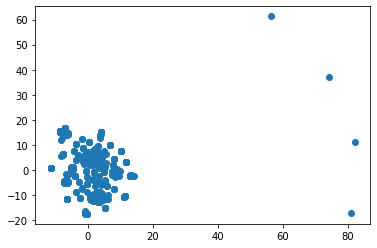

In [22]:
# scatter plot of t-SNE output
X = tsne_features[:,0]
y = tsne_features[:,1]
plt.scatter(X,y)
plt.show()

In [23]:
# k means cluster analysis
inertia = []
k = list(range(1,11))

for i in k:
    kmeans = KMeans(n_clusters=1, random_state=0)
    kmeans.fit(principal_components)
    inertia.append(kmeans.inertia_)

C:\Users\Elijah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Elijah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Elijah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Elijah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Window

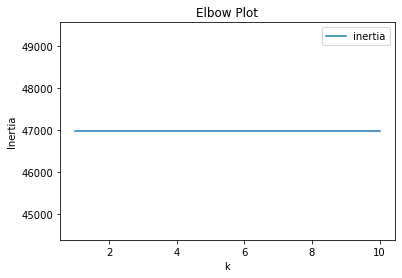

In [24]:
# elbow plot
elbow_df = pd.DataFrame({'k': k, 'inertia': inertia})
elbow_df.plot.line(x='k', y='inertia')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()